# EDA with Python on Titanic Dataset 

In this project we are going to work on exploratory data analysis of Titanic Dataset from Kaggle.

### Let's import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Train Data

In [2]:
df_train = pd.read_csv('DataSets/train.csv')
df_test = pd.read_csv('DataSets/test.csv')
df_train.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print('--------')

print('Test')
print('--------')
print(df_test.isnull().sum())
print('--------')
print('Train')
print('--------')

print(df_train.isnull().sum())


--------
Test
--------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
--------
Train
--------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
df_all = pd.concat([df_test,df_train.drop('Survived',axis=1)])

In [5]:
df_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
# df_all.iloc[:418] #test

#### Explanations about data from Kaggle


<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

In [7]:
df_all.shape

(1309, 11)

In [8]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [9]:
df_all.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


### Missing Values

In [10]:
df_all.isnull().sum()


PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

Roughly 20 percent of the Age data and 77 percent of the Cabin data are missing. 

Only 2 people aboard has no information about where he/she got on the ship.

These two rows can be dropped.

The heatmap below shows the distribution of the missing data within all data.

<AxesSubplot:>

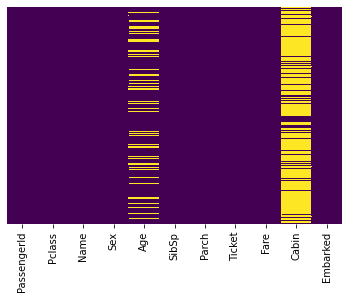

In [11]:
sns.heatmap(df_all.isnull(), yticklabels=False,cbar=False,cmap='viridis')

Lets examine the Age column and decide how we will handle with missing values.

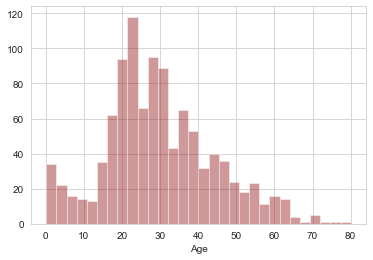

In [12]:
sns.set_style('whitegrid')
sns.distplot(df_all['Age'].dropna(),kde=False,color = 'darkred',bins=30);

<AxesSubplot:>

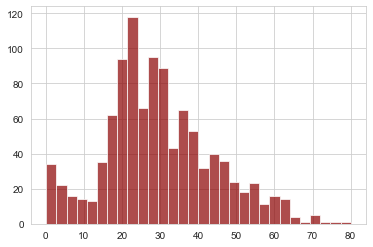

In [13]:
df_all['Age'].hist(bins=30,color='darkred',alpha=0.7)

In [14]:
print('Age mean:{}, Age median:{}'.format(df_train.Age.mean(), df_train.Age.median()))


Age mean:29.69911764705882, Age median:28.0


In [15]:
print('Age mean:{}, Age median:{}'.format(df_all.Age.mean(), df_all.Age.median()))


Age mean:29.881137667304014, Age median:28.0


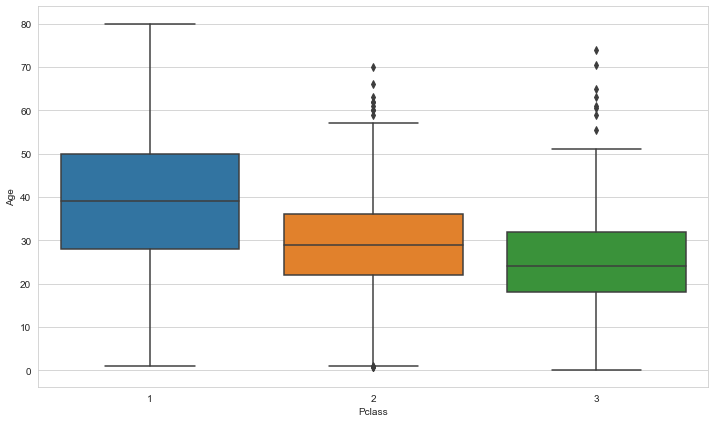

In [16]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=df_all);

From these boxplots can be interpreted that the older people preferd to be in first class, and as the class quality decreses the median age decreases. Lets find these median values.

In [17]:
##finding the ages median values by the passenger class 

median_class= {} 

for i in df_train.Pclass.unique():
    median_class['Class {}'.format(i)] = df_all[df_all.Pclass == i]['Age'].median()
    
for i in median_class:
    print(i,':', median_class[i])

Class 3 : 24.0
Class 1 : 39.0
Class 2 : 29.0


In [18]:
df_all['Age']=df_all['Age'].fillna(df_all.groupby('Pclass')['Age'].transform('median'))


<AxesSubplot:>

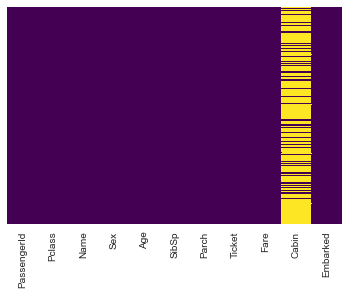

In [19]:
sns.heatmap(df_all.isnull(), yticklabels=False, cbar=False,cmap='viridis')

In [20]:
# sns.set_style('whitegrid')
# sns.countplot(x='Survived',data=df_train,palette='RdBu_r')

In [21]:
# sns.set_style('whitegrid')
# sns.countplot(x='Survived',hue='Sex',data=df_train,palette='RdBu_r')

In [22]:
# sns.set_style('whitegrid')
# sns.countplot(x='Survived',hue='Pclass',data=df_train,palette='rainbow')

In [23]:
# sns.countplot(x='SibSp',data=df_train)

<AxesSubplot:>

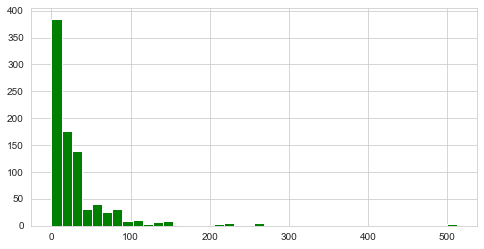

In [24]:
df_train['Fare'].hist(color='green',bins=40,figsize=(8,4))

#### Dropping cabin column

In [25]:
df_all.drop('Cabin', axis = 1, inplace= True)
df_all.dropna(inplace = True)

In [26]:
df_all.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Some feature engineering

In [27]:
df_train["Ticket"].value_counts(dropna = False).head(20)

1601            7
347082          7
CA. 2343        7
3101295         6
347088          6
CA 2144         6
S.O.C. 14879    5
382652          5
349909          4
17421           4
19950           4
347077          4
4133            4
2666            4
LINE            4
113781          4
PC 17757        4
W./C. 6608      4
113760          4
35273           3
Name: Ticket, dtype: int64

In [28]:
group_ticket_list = list(df_all.Ticket.value_counts()[df_all.Ticket.value_counts() > 1].index)
group_ticket_list
df_all["is_group"] = df_all['Ticket'].isin(group_ticket_list) * 1

In [29]:
# sns.countplot(x="Survived", data=df_train, hue="is_group")

In [30]:
df_all["is_not_alone"] = ((df_all["SibSp"] != 0) | (df_all["Parch"] != 0)) * 1

In [31]:
# sns.countplot(x="Survived", data=df_train, hue="is_alone")

In [32]:
df_all.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'is_group', 'is_not_alone'],
      dtype='object')

In [33]:
df_all["Female"]=( df_all['Sex'] == 'female') * 1

In [34]:
# plt.figure(figsize=(10,8))
# sns.heatmap(df_all.corr(), annot=True)

In [35]:
df_all = pd.get_dummies(data = df_all,columns=["Embarked"], drop_first=True)


<AxesSubplot:>

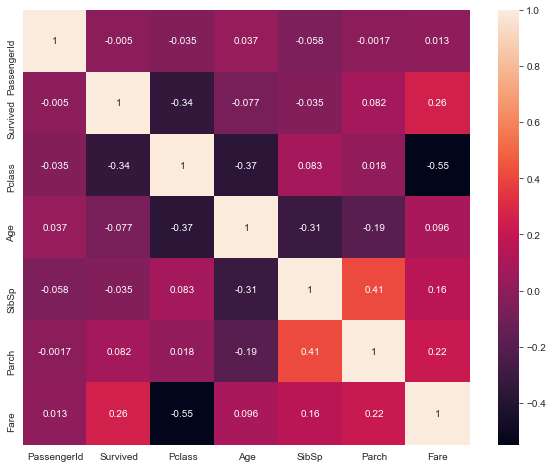

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(), annot=True)

In [37]:
df_all.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,is_group,is_not_alone,Female,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,1,1,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,0,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,1,1,1,0,1


let's drop the columns PassengerID, Name ,Sex, Ticket

In [38]:
df_all_ready = df_all.drop(['PassengerId', 'Name' ,'Sex', 'Ticket'], axis=1)

In [39]:
# plt.figure(figsize=(10,8))
# sns.heatmap(df_train_ready.corr(), annot = True)

In [40]:
# df_train_ready.corr()

In [41]:
df_all_ready = pd.get_dummies(data = df_all_ready,columns=["Pclass"], drop_first=True)

df_all_ready

,Age,SibSp,Parch,Fare,is_group,is_not_alone,Female,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,34.5,0,0,7.8292,0,0,0,1,0,0,1
1,47.0,1,0,7.0000,0,1,1,0,1,0,1
2,62.0,0,0,9.6875,0,0,0,1,0,1,0
3,27.0,0,0,8.6625,0,0,0,0,1,0,1
4,22.0,1,1,12.2875,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,0,0,0,0,1,1,0
887,19.0,0,0,30.0000,0,0,1,0,1,0,0
888,24.0,1,2,23.4500,1,1,1,0,1,0,1
889,26.0,0,0,30.0000,0,0,0,0,0,0,0


In [42]:
# df_train_ready.drop('SibSp', axis = 1, inplace = True)

In [43]:
df_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [44]:
df_all_ready.iloc[412:417]

,Age,SibSp,Parch,Fare,is_group,is_not_alone,Female,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
413,24.0,0,0,8.0500,0,0,0,0,1,0,1
414,39.0,0,0,108.9000,1,0,1,0,0,0,0
415,38.5,0,0,7.2500,0,0,0,0,1,0,1
416,24.0,0,0,8.0500,0,0,0,0,1,0,1
417,24.0,1,1,22.3583,1,1,0,0,0,0,1


In [45]:
df_test_ready = df_all_ready.iloc[:417]

In [46]:
df_train_ready = df_all_ready.iloc[417:]

In [47]:
df_train_y = df_train.Survived

In [48]:
df_train_y.shape

(891,)

In [49]:
df_train_ready.shape

(889, 11)

In [50]:
# df_train[df_train['Embarked'] == ]

In [51]:
df_train[df_train['Embarked'].isnull()].index.tolist()

[61, 829]

In [52]:
df_train_y_ready = df_train_y.drop([61,829])

## Model

In [53]:
X = df_train_ready.values
y = df_train_y_ready.values

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=34)

##### Training 

In [55]:
from sklearn.linear_model import LogisticRegression


In [56]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [57]:
model.score(X_test,y_test)

0.8340807174887892

In [58]:
y_pred = model.predict(X_test)

In [59]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_test,y_test,cv=10)
print('Cross-Validation Accuracy Scores', scores.mean())

Cross-Validation Accuracy Scores 0.8207509881422924


In [60]:
scores

array([0.82608696, 0.82608696, 0.7826087 , 0.72727273, 0.77272727,
       0.86363636, 0.81818182, 0.90909091, 0.77272727, 0.90909091])

#### Evaluation

In [61]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       136
           1       0.82      0.74      0.78        87

    accuracy                           0.83       223
   macro avg       0.83      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223



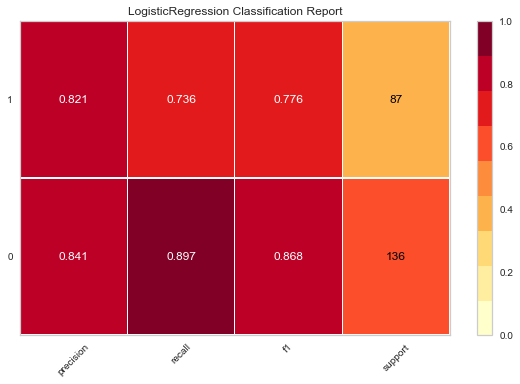

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [63]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
visualizer = ClassificationReport(model, support=True)
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

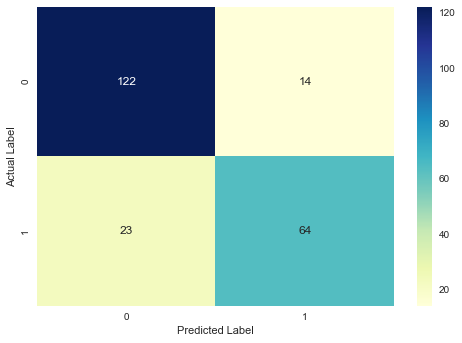

In [64]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## XGBoost

In [65]:
from xgboost import XGBClassifier

In [66]:
xgb_model = XGBClassifier().fit(X_train, y_train)

[23:55:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [67]:
y_pred = xgb_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[118  18]
 [ 22  65]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       136
           1       0.78      0.75      0.76        87

    accuracy                           0.82       223
   macro avg       0.81      0.81      0.81       223
weighted avg       0.82      0.82      0.82       223



## RandomForest 

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rf_model = RandomForestClassifier().fit(X,y)
rf_model

RandomForestClassifier()

In [70]:
# y_pred_rf = rf_model.predict(X_test)

In [71]:
# cnf_matrix = confusion_matrix(y_test,y_pred_rf)

# print(cnf_matrix)
# print('\n')
# print(classification_report(y_test,y_pred_rf))

# sns.heatmap(cnf_matrix, annot = True,cmap = 'YlGnBu',fmt='d')
# plt.ylabel("Actual")
# plt.xlabel("Predicted")
# plt.show()


In [72]:
predicitions = rf_model.predict(df_test_ready.values)

In [73]:
df_pred = pd.DataFrame(rf_model.predict_proba(df_test_ready.values))

In [74]:
df_pred['survived'] = predicitions

In [75]:
df_pred

,0,1,survived
0,0.980000,0.020000,0
1,0.700000,0.300000,0
2,0.750000,0.250000,0
3,0.330000,0.670000,1
4,0.415000,0.585000,1
...,...,...,...
412,1.000000,0.000000,0
413,0.000000,1.000000,1
414,0.993333,0.006667,0
415,1.000000,0.000000,0


In [76]:
import pickle

pickle.dump(rf_model, open ('titanic_rf_clf.pkl','wb'))

In [77]:
# df_train_ready.columns

In [78]:
# df_train_ready.describe().T

In [79]:
# df_train['Name'].str[0]

In [80]:
# df_train_ready

In [81]:
# df_for_encoding = df_train.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1).dropna()

In [82]:
# df_encode = df_for_encoding[['Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked', 'Pclass']]

In [83]:
# df_encode.to_csv('df_encode.csv',index=False)

In [84]:
# group_ticket_list

In [85]:
# df_all_ready['Female'].map({0:1,1:0})

In [86]:
# df_all_ready['Female']